# CP322 Group Project

## Prepared By:
### Jordan Dubrick - 201859360
### Omogbolahan Arif Ashogbon - 190850840
### Gavan Singh - 190856220

# Imports

In [ ]:

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Import CSV



In [ ]:
dataset = pd.read_csv("CP322-Project-Dataset.csv")
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#Data Preprocessing & Visualization of Preprocessing

In this dataset the column names are very long and have 'Xn' infront of them, as well as 'Y' for that target feature. Additionally, there is a 'No' column for how many records we have, however, pandas does this for us so it is not required.

This cell block aims to reduce column name length, trim Xn and Y off the beginning, and drops the unneeded column.

In [ ]:
dataset = dataset.rename(columns={"X1 transaction date": "Transaction Dt", "X2 house age": "House Age", "X3 distance to the nearest MRT station": "Dist To MRT", "X4 number of convenience stores": "Stores", "X5 latitude": "Latitude",
                          "X6 longitude": "Longitude", "Y house price of unit area": "House Price"})
dataset.drop('No', axis=1, inplace=True)
dataset.head()





,Transaction Dt,House Age,Dist To MRT,Stores,Latitude,Longitude,House Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


This cell block is used to visualize the dataset after preprocessing changes regarding column names, and column drops have occcured. We employ the use of boxplots to identify which columns have outliers within them so that they can be addressed.

Using the boxplot visualization technique we identified that **Dist To MRT, Latitude, Longitude, and House Price** contained outliers.

The z-score technique was used to identify and remove outlier records after their columns were visually discovered.

After all outliers have been removed we checkout the dataset to see all of the changes (in record count).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


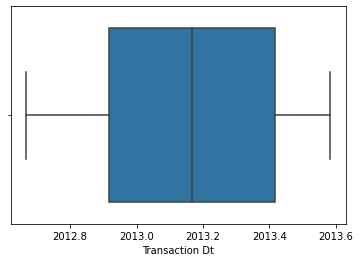

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


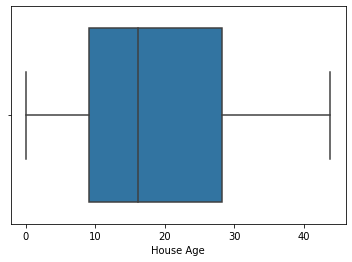

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


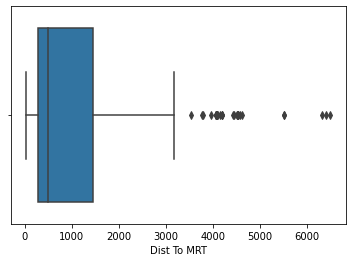

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


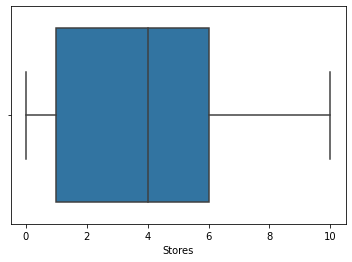

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


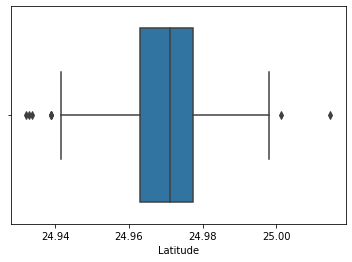

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


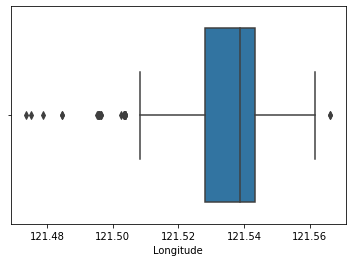

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


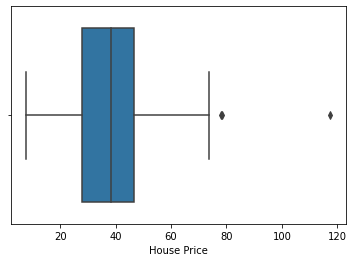

,Transaction Dt,House Age,Dist To MRT,Stores,Latitude,Longitude,House Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Boxplot Visualization
sns.boxplot(dataset['Transaction Dt'])
plt.show()
sns.boxplot(dataset['House Age'])
plt.show()
sns.boxplot(dataset['Dist To MRT'])
plt.show()
sns.boxplot(dataset['Stores'])
plt.show()
sns.boxplot(dataset['Latitude'])
plt.show()
sns.boxplot(dataset['Longitude'])
plt.show()
sns.boxplot(dataset['House Price'])
plt.show()

# Set the z-scores for each problem column
z_score_df = dataset
z_score_df['z_mrt'] = sp.stats.zscore(z_score_df['Dist To MRT'])
z_score_df['z_latitude'] = sp.stats.zscore(z_score_df['Latitude'])
z_score_df['z_longitude'] = sp.stats.zscore(z_score_df['Longitude'])
z_score_df['z_price'] = sp.stats.zscore(z_score_df['House Price'])

# Grab all outliers based off z-score +/- 3
outliers_mrt = z_score_df.index[z_score_df['z_mrt'].abs() > 3 ].tolist()
outliers_lat = z_score_df.index[z_score_df['z_latitude'].abs() > 3 ].tolist()
outliers_long = z_score_df.index[z_score_df['z_longitude'].abs() > 3 ].tolist()
outliers_price = z_score_df.index[z_score_df['z_price'].abs() > 3 ].tolist()
outliers = outliers_mrt + outliers_lat + outliers_long + outliers_price

# Remove Duplicates
outliers = list(set(outliers)) 

# Update Dataset to Reflect Changes
dataset = dataset.drop(dataset.index[outliers])
dataset = dataset.drop(columns = ['z_mrt', 'z_latitude', 'z_longitude', 'z_price'])

# Display the dataset after it has been cleaned of missing values and outliers
dataset

# Data Quality Report

In this cell block we prepare the Data Quality Report.

From the previous block we know that Dist To MRT, Latitude, Longitude and House Price were out outlier columns, and those were dealt with above.

In this cell block we make use of pandas 'isna()' function to identify and missing values within the dataset. Luckily, there were no records in our dataset that were missing values.

You can view the data quality report in the form of a table below.

In [ ]:
print("Data Quality Report")
print("-"*30)

missing_values = dataset.isna().sum()
print("Missing Values")
print("-"*30 + "\n")
print(missing_values)
print("\n" + "-"*30)
print("Outliers")
print("-"*30 + "\n")
print("Feature     | Data Quality Issue | Handling Strategy")
print("-"*53)
print("Dist To MRT | Outliers           | Deletion")
print("Latitude    | Outliers           | Deletion")
print("Longitude   | Outliers           | Deletion")
print("House Price | Outliers           | Deletion")
print("-"*53 + "\n")

Data Quality Report
------------------------------
Missing Values
------------------------------

Transaction Dt    0
House Age         0
Dist To MRT       0
Stores            0
Latitude          0
Longitude         0
House Price       0
dtype: int64

------------------------------
Outliers
------------------------------

Feature     | Data Quality Issue | Handling Strategy
-----------------------------------------------------
Dist To MRT | Outliers           | Deletion
Latitude    | Outliers           | Deletion
Longitude   | Outliers           | Deletion
House Price | Outliers           | Deletion
-----------------------------------------------------



# Model Selection

For model selection we chose a Regression model. This is because the independent variables have a linear relationship to the dependent variable. To identify this we used a pairplot to visualize the relationships. Additionally, our dataset has few records and Linear Regression models require less data than others such as KNN, Decision Tree, and SVM algorithms. 

By employing the use of a Linear Regression algorithm we also gain the benefit of quick runtimes and easy intepretation.

Using the train_test_split() function from sklearn, we split our dataset into 75% training and 25% testing and fit our regression model using the training data.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


LinearRegression()

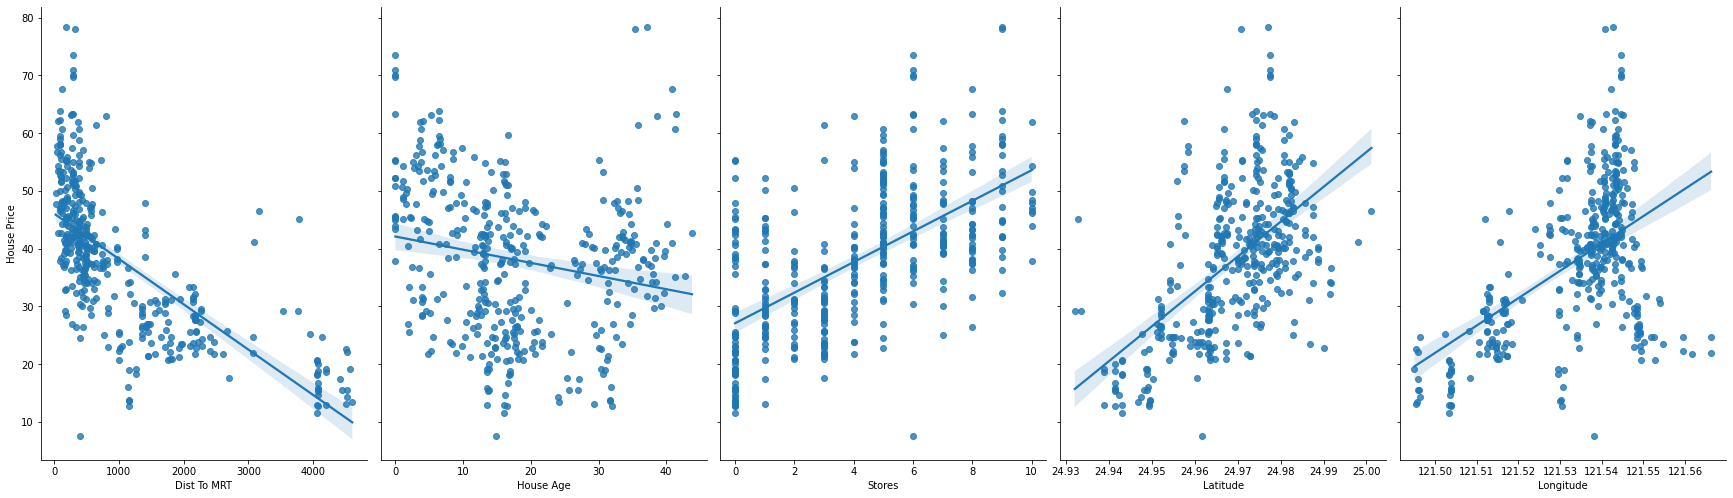

In [ ]:
#We chose regression because the dependent variabls have a linear relationship to the independent variable "House prices".
#To check this, we made a pairplot the visualizes this linear relationships
sns.pairplot(dataset, x_vars=['Dist To MRT', 'House Age', 'Stores', 'Latitude', 'Longitude'], y_vars='House Price', size=7, aspect=0.7, kind='reg')

# Grab the independent variables (x)
x = dataset.drop('House Price', axis=1)
# Grab the dependent variable (y)
y = dataset['House Price']

# Split dataset on a 75/25 basis for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fit train data to the model using linear regression
lin_regression_model = LinearRegression()
lin_regression_model.fit(X_train, Y_train)

# Model Evaluation & Performance

Due to our model being Regression based, our model evaluation is different when compared to previous assignments. We have to make use of various techniques such as Mean Squared Error, Mean Absolute Error, and R-Squared to properly analyze our models performance.

Based on the results of the code block, we can see that the predicted results of our regression model follows the general trend of the test data with a positive line of correlation. 

Our model has the following performance results:


1.   Mean Squared Error (how close a regression line is to a set of data points) of **81.6**
2.   Absolute mean error (errors between paired observations expressing the same phenomenon) of **6.65**
3.   R-Squared of (how well data fit the model) **0.54**

 
We strongly believe that the results we have observed would be greatly improved if the dataset was a little big larger. With the limited amount of records contained in this dataset we believe the model was not trained enough to give very accurate results.



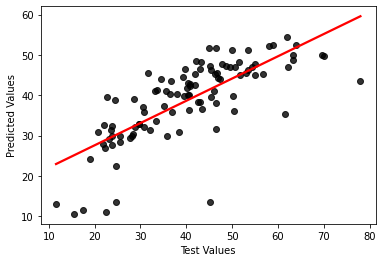


Model Accuracy Results
Mean Squared Error: 81.6
Mean Absolute Error: 6.65
R-Squared: 0.54


In [ ]:
# Run the model against the test data that it has not seen
predicted = lin_regression_model.predict(X_test)

# Display the regression plot for our Y_test values against the models predicted
# results
sns.regplot(x=Y_test.values,y=predicted,ci=None,scatter_kws={"color": "black"}, line_kws={"color": "red"});
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.show()

# Because we are using multi-linear regression we will evaluate the accuracy of this model
# by using Mean Squared Error and Mean Absolute Error
# of  the predicted values vs. dependent data

mean_squared_err = mean_squared_error(Y_test, predicted)
mean_absolute_err = mean_absolute_error(Y_test, predicted)
print()
print("Model Accuracy Results")
print(f"Mean Squared Error: {mean_squared_err.round(2)}")
print(f"Mean Absolute Error: {mean_absolute_err.round(2)}")
print(f"R-Squared: {lin_regression_model.score(X_test,Y_test).round(2)}")

